In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
df = pd.read_csv("flights-1m-parquet.csv")

In [3]:
df.columns.tolist()

['FL_DATE',
 'DEP_DELAY',
 'ARR_DELAY',
 'AIR_TIME',
 'DISTANCE',
 'DEP_TIME',
 'ARR_TIME']

In [4]:
df.isnull().sum()

FL_DATE      0
DEP_DELAY    0
ARR_DELAY    0
AIR_TIME     0
DISTANCE     0
DEP_TIME     0
ARR_TIME     0
dtype: int64

In [5]:
df.head()

,FL_DATE,DEP_DELAY,ARR_DELAY,AIR_TIME,DISTANCE,DEP_TIME,ARR_TIME
0,2006-01-01,5,19,350,2475,9.083333,12.483334
1,2006-01-02,167,216,343,2475,11.783334,15.766666
2,2006-01-03,-7,-2,344,2475,8.883333,12.133333
3,2006-01-04,-5,-13,331,2475,8.916667,11.950000
4,2006-01-05,-3,-17,321,2475,8.950000,11.883333


In [6]:
df.isnull().sum()

FL_DATE      0
DEP_DELAY    0
ARR_DELAY    0
AIR_TIME     0
DISTANCE     0
DEP_TIME     0
ARR_TIME     0
dtype: int64

In [7]:
# df = df.drop(['instant',
#  'dteday',
#  'season',
#  'yr',
#  'mnth',
#  'holiday',
#  'weekday',
#  'workingday',
#  'weathersit',
#  'casual',
#  'registered',
#  'cnt'], axis =1)

In [8]:
num = df.select_dtypes(include=[np.number])

skew = num.skew()
print("\n skew \n", skew)

kurt = num.kurt()
print("\n kurtosis \n", kurt)


 skew 
 DEP_DELAY    5.692913
ARR_DELAY    5.295505
AIR_TIME     1.580323
DISTANCE     1.626722
DEP_TIME     0.023417
ARR_TIME    -0.331587
dtype: float64

 kurtosis 
 DEP_DELAY    110.204456
ARR_DELAY     68.233569
AIR_TIME       3.245480
DISTANCE       3.460154
DEP_TIME      -0.962584
ARR_TIME      -0.363319
dtype: float64


In [ ]:
# #Step 1: Apply square root transformation
# from sklearn.preprocessing import PolynomialFeatures
# sqrt_transformed = np.sqrt(num) 
# # Step 2: Apply polynomial transformation
# poly = PolynomialFeatures(degree=2, include_bias=False)  # Degree 2 for quadratic features
# polynomial_features = poly.fit_transform(sqrt_transformed) 
# print("Original Data:\n", num)
# print("Square Root Transformed Data:\n", sqrt_transformed)
# print("Polynomial Features:\n", polynomial_features)

# from sklearn.impute import SimpleImputer
# from sklearn.preprocessing import PolynomialFeatures

# # Step 1: Impute missing values
# imputer = SimpleImputer(strategy='mean')  # or 'median', 'most_frequent'
# sqrt_transformed_imputed = imputer.fit_transform(sqrt_transformed)

# # Step 2: Apply polynomial transformation
# poly = PolynomialFeatures(degree=2, include_bias=False)
# polynomial_features = poly.fit_transform(sqrt_transformed_imputed)

# polynomial_features

import numpy as np
from sklearn.preprocessing import PolynomialFeatures
from sklearn.impute import SimpleImputer

# Assuming 'num' is your original NumPy array or DataFrame
# Step 1: Apply square root transformation
sqrt_transformed = np.sqrt(num)

# Step 2: Handle missing values using imputation
imputer = SimpleImputer(strategy='mean')  # You can also use 'median' or 'most_frequent'
sqrt_transformed_imputed = imputer.fit_transform(sqrt_transformed)

# Step 3: Apply polynomial transformation
poly = PolynomialFeatures(degree=2, include_bias=False)  # Degree 2 for quadratic features
polynomial_features = poly.fit_transform(sqrt_transformed_imputed)

# Display results
print("Original Data:\n", num)
print("Square Root Transformed Data:\n", sqrt_transformed)
print("Polynomial Features:\n", polynomial_features)


C:\Users\baps\AppData\Roaming\Python\Python311\site-packages\pandas\core\internals\blocks.py:395: RuntimeWarning: invalid value encountered in sqrt
  result = func(self.values, **kwargs)


Original Data:
         DEP_DELAY  ARR_DELAY  AIR_TIME  DISTANCE   DEP_TIME   ARR_TIME
0               5         19       350      2475   9.083333  12.483334
1             167        216       343      2475  11.783334  15.766666
2              -7         -2       344      2475   8.883333  12.133333
3              -5        -13       331      2475   8.916667  11.950000
4              -3        -17       321      2475   8.950000  11.883333
...           ...        ...       ...       ...        ...        ...
999995         87         86        71       545  19.733334  21.333334
999996         -2          0        71       508   8.050000   9.583333
999997         33         19        64       508  14.700000  15.983334
999998         65         54        65       508  17.633333  18.983334
999999        141        135        70       508   1.183333   2.616667

[1000000 rows x 6 columns]
Square Root Transformed Data:
         DEP_DELAY  ARR_DELAY   AIR_TIME   DISTANCE  DEP_TIME  ARR_TIME
0 

In [18]:
#Step 1: Apply square root transformation
from sklearn.preprocessing import PolynomialFeatures
sqrt_transformed = np.sqrt(num) 
# Step 2: Apply polynomial transformation
poly = PolynomialFeatures(degree=2, include_bias=False)  # Degree 2 for quadratic features
polynomial_features = poly.fit_transform(sqrt_transformed) 
print("Original Data:\n", num)
print("Square Root Transformed Data:\n", sqrt_transformed)
print("Polynomial Features:\n", polynomial_features)

C:\Users\baps\AppData\Roaming\Python\Python311\site-packages\pandas\core\internals\blocks.py:395: RuntimeWarning: invalid value encountered in sqrt
  result = func(self.values, **kwargs)


ValueError: Input X contains NaN.
PolynomialFeatures does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values

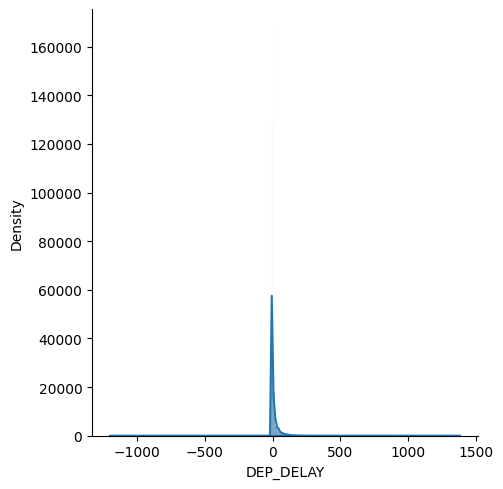

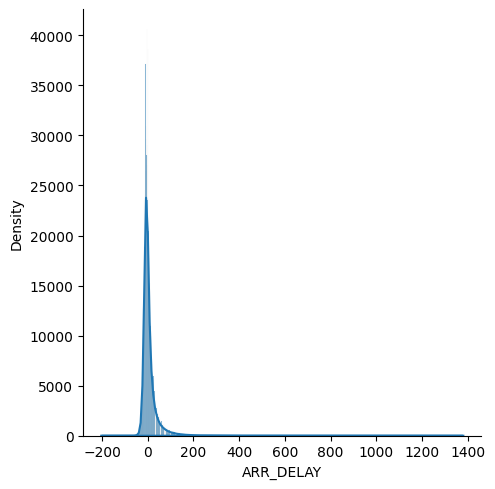

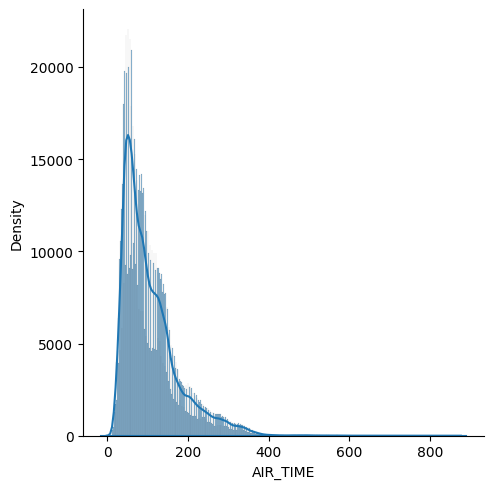

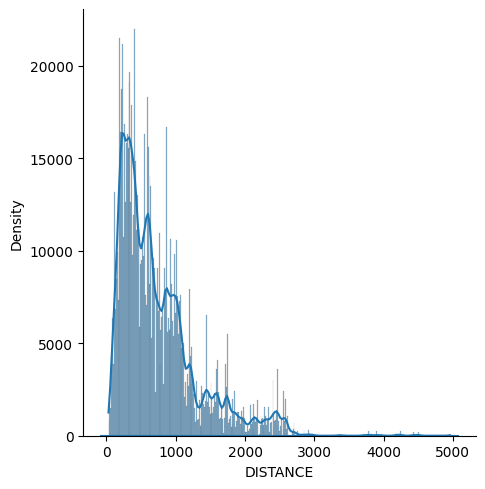

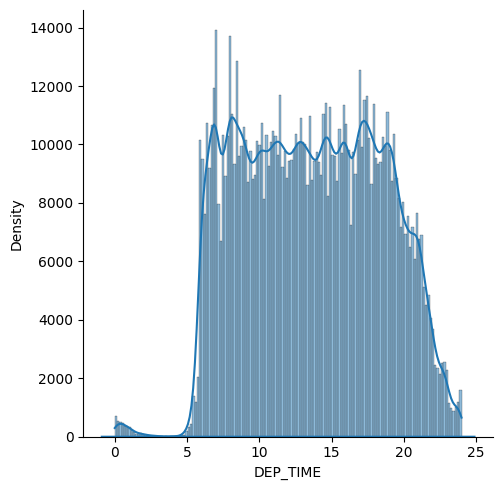

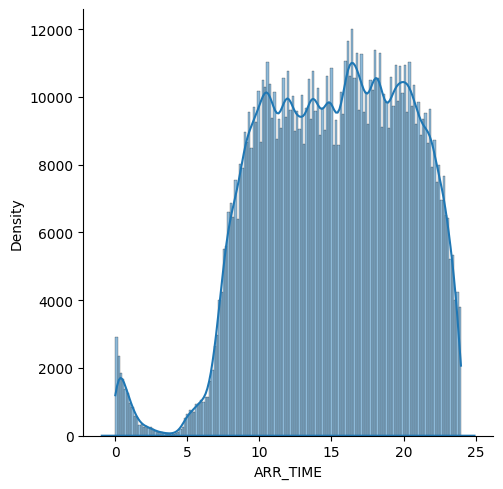

In [10]:
for col in num:
    sns.displot(df[col], kind = 'kde')
    sns.histplot(df[col], kde=True)

In [ ]:
# for col in num:
#     df[col] = np.log(df[col])
#     print(df[col])

0         1.609438
1         5.117994
2              NaN
3              NaN
4              NaN
            ...   
999995    4.465908
999996         NaN
999997    3.496508
999998    4.174387
999999    4.948760
Name: DEP_DELAY, Length: 1000000, dtype: float64
0         2.944439
1         5.375278
2              NaN
3              NaN
4              NaN
            ...   
999995    4.454347
999996        -inf
999997    2.944439
999998    3.988984
999999    4.905275
Name: ARR_DELAY, Length: 1000000, dtype: float64
0         5.857933
1         5.837730
2         5.840642
3         5.802118
4         5.771441
            ...   
999995    4.262680
999996    4.262680
999997    4.158883
999998    4.174387
999999    4.248495
Name: AIR_TIME, Length: 1000000, dtype: float64
0         7.813996
1         7.813996
2         7.813996
3         7.813996
4         7.813996
            ...   
999995    6.300786
999996    6.230481
999997    6.230481
999998    6.230481
999999    6.230481
Name: DISTANCE, Le

C:\Users\baps\AppData\Roaming\Python\Python311\site-packages\pandas\core\arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\Users\baps\AppData\Roaming\Python\Python311\site-packages\pandas\core\arraylike.py:399: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [17]:
import numpy as np

from scipy.stats import boxcox

import matplotlib.pyplot as plt
 
# Example dataset (non-normal distribution)

# data = np.random.exponential(scale=2, size=1000)
 
# Apply Box-Cox transformation

# Note: Box-Cox requires all data points to be positive

transformed_data, lambda_value = boxcox(num['DISTANCE'])
 
# Print the optimal lambda value

print(f"Optimal Lambda: {lambda_value}")
 
# Plot original vs transformed data

# plt.figure(figsize=(12, 6))
 
# plt.subplot(1, 2, 1)

# plt.hist(data, bins=30, color='skyblue', edgecolor='black')

# plt.title("Original Data")
 
# plt.subplot(1, 2, 2)

# plt.hist(transformed_data, bins=30, color='lightgreen', edgecolor='black')

# plt.title("Box-Cox Transformed Data")
 
# plt.tight_layout()

# plt.show()

 

Optimal Lambda: 0.1019722387519486


In [8]:
from sklearn.preprocessing import PowerTransformer

pt = PowerTransformer(method='yeo-johnson')
transformed = pt.fit_transform(df[['DEP_DELAY']])
transformed

array([[ 0.02203604],
       [ 3.92280316],
       [-0.61626137],
       ...,
       [ 0.86508399],
       [ 1.67654246],
       [ 3.38044014]], shape=(1000000, 1))

In [11]:
from scipy.stats import skew
print("Skewness before:", skew(num))
print("Skewness after:", skew(transformed))


Skewness before: [ 5.69290418  5.29549663  1.58032096  1.62671935  0.02341669 -0.33158607]
Skewness after: [-43.22966109]


In [14]:
from scipy.stats import skew, kurtosis
 
# For each numerical column
for column in df.select_dtypes(include=[np.number]).columns:
    col_skew = skew(df[column].dropna())       # dropna removes any missing values
    col_kurt = kurtosis(df[column].dropna())   # Fisher’s definition (normal = 0)
 
    print(f"{column}: Skewness = {col_skew:.2f}, Kurtosis = {col_kurt:.2f}")

DEP_DELAY: Skewness = 5.69, Kurtosis = 110.20
ARR_DELAY: Skewness = 5.30, Kurtosis = 68.23
AIR_TIME: Skewness = 1.58, Kurtosis = 3.25
DISTANCE: Skewness = 1.63, Kurtosis = 3.46
DEP_TIME: Skewness = 0.02, Kurtosis = -0.96
ARR_TIME: Skewness = -0.33, Kurtosis = -0.36


In [8]:
# for col in num:
#     df[col] = np.reciprocal(df[col])
#     print(df[col])

In [ ]:
# from scipy.stats import skew, kurtosis
 
# # For each numerical column
# for column in df.select_dtypes(include=[np.number]).columns:
#     col_skew = skew(df[column].dropna())       # dropna removes any missing values
#     col_kurt = kurtosis(df[column].dropna())   # Fisher’s definition (normal = 0)
 
#     print(f"{column}: Skewness = {col_skew:.2f}, Kurtosis = {col_kurt:.2f}")

DEP_DELAY: Skewness = -4.69, Kurtosis = 21.26
ARR_DELAY: Skewness = -5.45, Kurtosis = 30.36
AIR_TIME: Skewness = -39.23, Kurtosis = 1732.72
DISTANCE: Skewness = 2.57, Kurtosis = 15.52
DEP_TIME: Skewness = -20.19, Kurtosis = 657.88
ARR_TIME: Skewness = -20.78, Kurtosis = 669.32


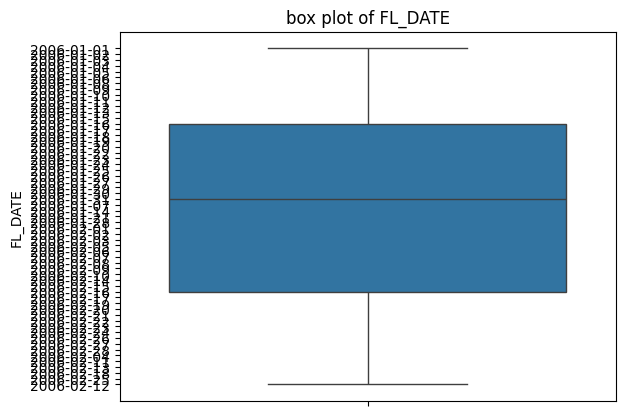

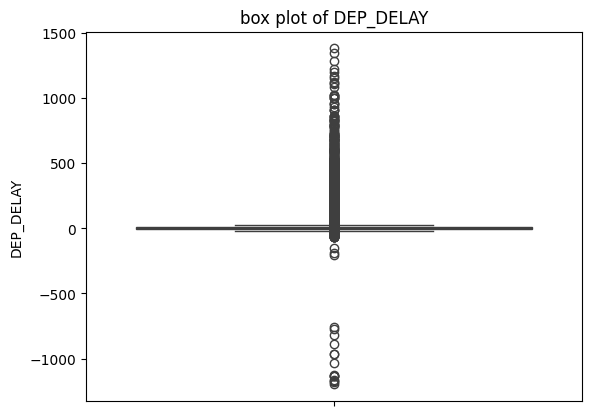

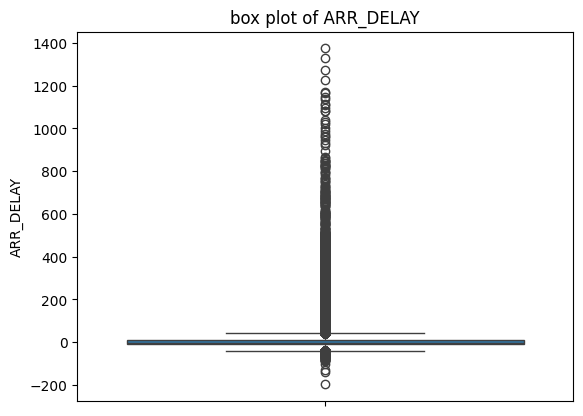

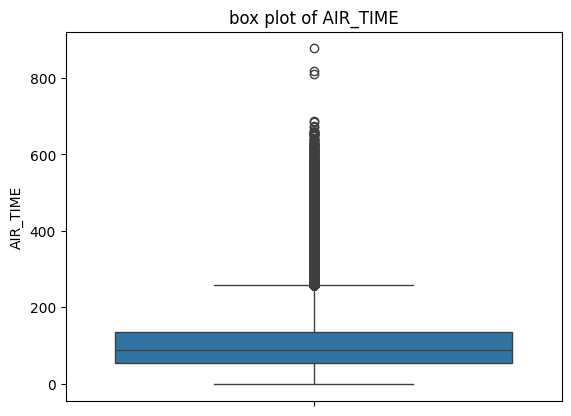

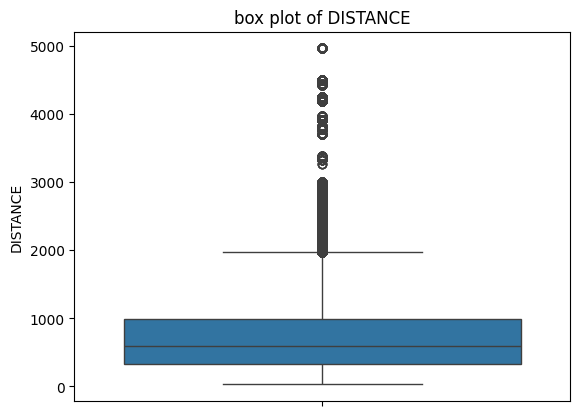

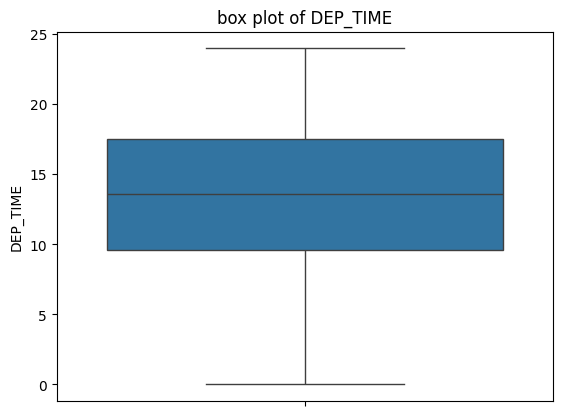

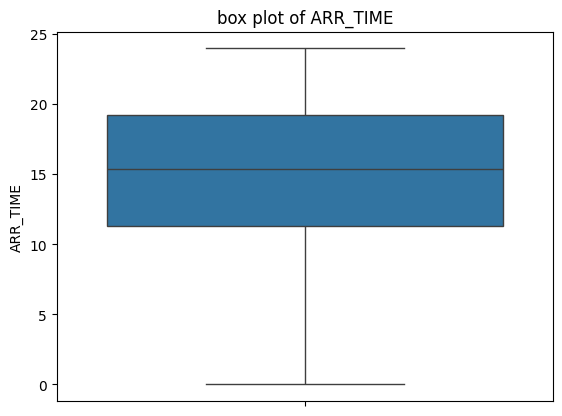

In [12]:
for column in df.columns:
    sns.boxplot(y=column, data = df)
    plt.title(f'box plot of {column}')
    plt.show()

In [9]:
import pandas as pd
from scipy.stats import zscore

# Load your dataset
# df = pd.read_csv('your_dataset.csv')  # Replace with your actual file path

# Choose the columns to apply z-score filtering
columns_to_check = ['DISTANCE','ARR_DELAY']  # Use your actual column names

# Calculate z-score for those columns
z_scores = df[columns_to_check].apply(zscore)

# Apply threshold (e.g., abs(zscore) < 3)
threshold = 3
filtered_df = df[(z_scores.abs() < threshold).all(axis=1)]

print('After z-score filtering:', filtered_df.shape)

After z-score filtering: (962942, 7)


<Figure size 640x480 with 0 Axes>

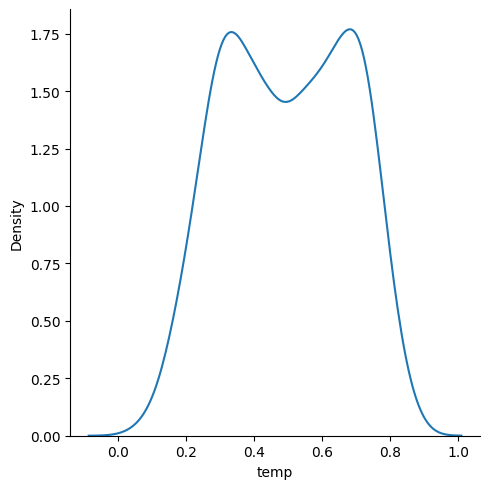

<Figure size 640x480 with 0 Axes>

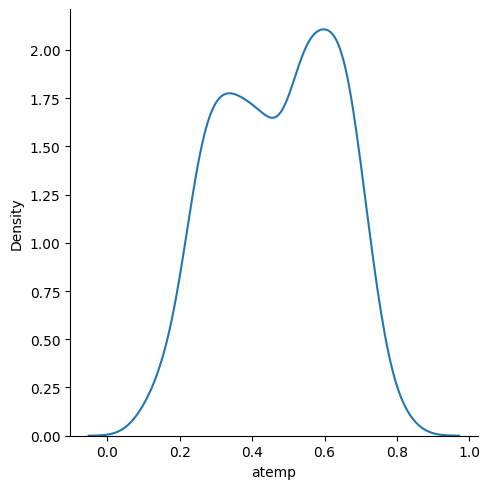

<Figure size 640x480 with 0 Axes>

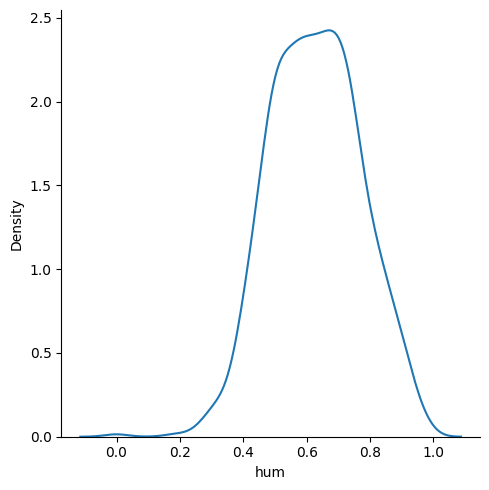

<Figure size 640x480 with 0 Axes>

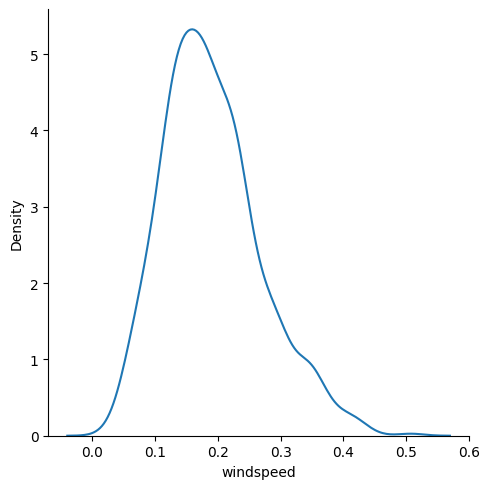

In [30]:
for columns in df.columns:
    plt.figure()
    sns.displot(df[columns],kind = 'kde')

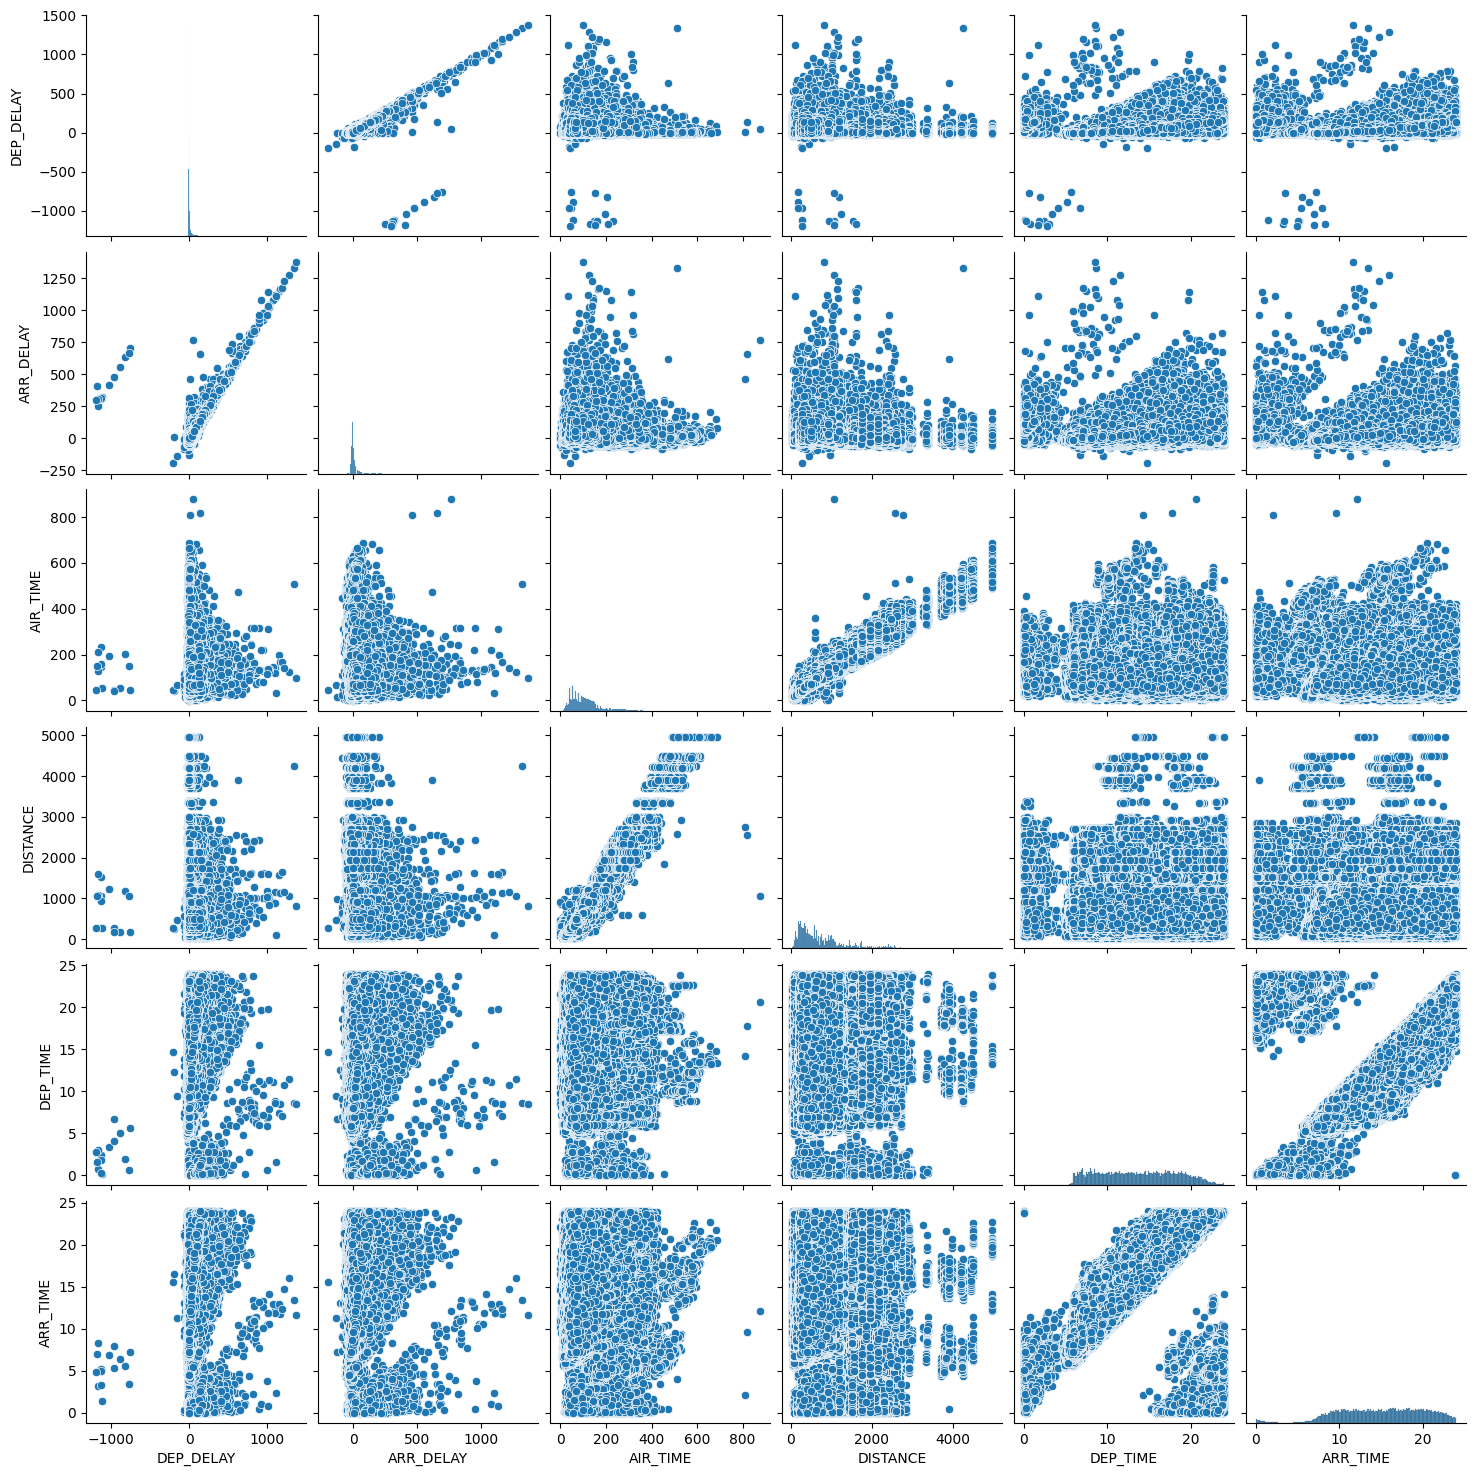

In [10]:
num = df.select_dtypes(include='number')
sns.pairplot(data = num)

In [31]:
from scipy.stats import zscore
print('Before outlier removal : ',df.shape)

z = np.abs(zscore(df, axis = 1))
threshold = 3

dataset = df[(z < threshold).all(axis=1)]
print('After Z-Score approach : ',dataset.shape)

Before outlier removal :  (731, 4)
After Z-Score approach :  (731, 4)


In [32]:
Q1 = dataset.quantile(0.25)  # Q1
Q3 = dataset.quantile(0.75)  # Q3
IQR = Q3-Q1
dataset = dataset[~((dataset<(Q1-1.5*IQR)) | (dataset>(Q3+1.5*IQR)))]
print('After IQR approach : ',dataset.shape)

After IQR approach :  (731, 4)
